# Does Covid-19 have the same impact on the developed countries and the developing countries's employement?

- Author: Jiayi Zhou

- Email: jiayizhou@berkeley.edu

- Course: DIGHUM100 

- Instructor: Adam Anderson

In [1]:
# Imported the libraries needed by this project, this code has referenced the Data8 course 
# taught at Berkeley during Srping 2020. 
import numpy as np
import pandas as pd

from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Only run this in google.colab/not here
# from google.colab import drive
# drive.mount('/content/drive') 

# Instructions for dataset import
- Step 1: Save the employment_data.csv somewhere in your drive.
- Step 2: Click on the "File" button on the left vertical bar. 
- Step 3: Find employment_data.csv, right click, and copy the path. 
- Step 4: Paste the path in the parentheses after Table.read_table below.

In [3]:
# imported the employment dataset. The dummy variable is added by myself according to the United Nation's publication. 
# I have categorized all the transitioning countries into developing countries, as they are not yet fully developed 
# by definition
# location in author's Drive: "/content/drive/MyDrive/Dataset for DIGHUM100/employment_data.csv"
employment = Table.read_table("employment_data.csv")
employment

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1


# Description of Variables In The Dataset

This dataset collated various datasets from covid monitoring section. Most of the estimates are from 2020. This section is directly collected from kaggle.

URL of dataset: https://www.kaggle.com/vineethakkinapalli/impact-of-covid19-on-employment-ilostat

- country: Name of Country
- total_weekly_hours_worked(estimates_in_thousands): Total weekly hours worked of employed persons
- percentage_of_working_hrs_lost(%): Percentage of hours lost compared to the baseline (4th quarter of 2019)
- percent_hours_lost_40hrs_per_week(thousands): Percentage of hours lost compared to the baseline (4th quarter of 2019) expressed in full-time equivalent employment losses. This measure is constructed by dividing the number of weekly hours lost due to COVID-19 and dividing them by 40.
- percent_hours_lost_48hrs_per_week(thousands): Percentage of hours lost compared to the baseline (4th quarter of 2019) expressed in full-time equivalent employment losses. This measure constructed by dividing the number of weekly hours lost due to COVID-19 and dividing them by 48.
- labour_dependency_ratio - Ratio of dependants (persons aged 0 to 14 + persons aged 15 and above that are either outside the labour force or unemployed) to total employment.
- employed_female_25+_2019(estimates in thousands): Employed female in 2019 who, during a specified brief period, were in one of the following categories: a) paid employment (whether at work or with a job but not at work); or b) self-employment (whether at work or with an enterprise but not at work).
- employed_male_25+_2019(estimates in thousands): Employed male in 2019 who, during a specified brief period, were in one of the following categories: a) paid employment (whether at work or with a job but not at work); or b) self-employment (whether at work or with an enterprise but not at work).
- ratio_of_weekly_hours_worked_by_population_age_15-64: Ratio of total weekly hours worked to population aged 15-64.

# Basic Data visualizations

In [4]:
# the number of countries that are included in the datasets
len(employment.column('country'))

189

In [5]:
# the number of developed countries
len((employment.where('Developing Country', are.equal_to(0))).column('country'))

36

In [6]:
# the proportion of countries in the table that is a developing country
np.average(employment.column('Developing Country') == 1)

0.8095238095238095

In [7]:
# selected all the countries that are developing countries
employment_developing = employment.where('Developing Country', are.equal_to(1))
# calculated the average percentage of working hours loss in the developing countries
developing_percentage_working_hours_lost = np.average(employment_developing.column('percentage_of_working_hrs_lost'))
developing_percentage_working_hours_lost                                                                                                                

9.169281045751635

In [8]:
# selected all the countries that are developed countries
employment_developed = employment.where('Developing Country', are.equal_to(0))
# calculated the average percentage of working hours loss in the developed countries
developed_percentage_working_hours_lost = np.average(employment_developed.column('percentage_of_working_hrs_lost'))
developed_percentage_working_hours_lost

7.319444444444445

In [9]:
# Visualization: average percentage of working hours loss in the developed countries vs. developing country. 
# Reference: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

<BarContainer object of 2 artists>

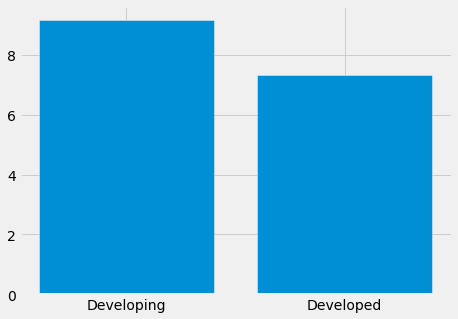

In [10]:
fig = plots.figure()
ax = fig.add_axes([0,0,1,1])
x_name = ['Developing', 'Developed']
bar_value = [developing_percentage_working_hours_lost, developed_percentage_working_hours_lost]
ax.bar(x_name,bar_value)

In [11]:
# calculated the dependency ratio in the developing countries. 
developing_dependency_ratio = np.average(employment_developing.column('labour_dependency_ratio'))
developing_dependency_ratio

1.7208496732026142

In [12]:
# calculated the dependency ratio in the developed countries. 
developed_dependency_ratio = np.average(employment_developed.column('labour_dependency_ratio'))
developed_dependency_ratio

1.2297222222222224

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


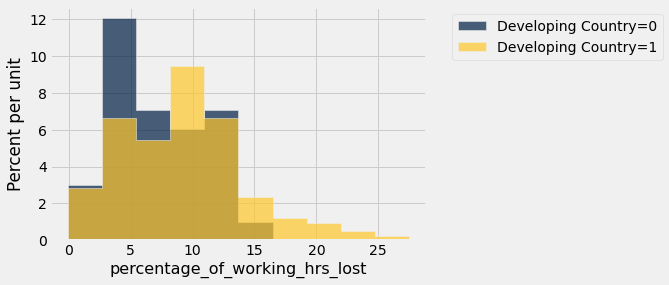

In [13]:
# Visualization 1: percentage of working hours lost in the developed/developing countries.
working_hour_visualization= employment.select('Developing Country', 'percentage_of_working_hrs_lost')
working_hour_visualization.hist('percentage_of_working_hrs_lost', group = 'Developing Country')

Interpretation：The color-coded histogram above takes 189 countries into account. The x-axis represent the percentage of working hours lost. The bar area present the percentage of these 189 countries which has lost x percentage of working hours.The tail of the yellow bars, which represent the developing countries, have further spread to the right. The tail of the blue bars, which represent the developed countries, concentrate more on the left. Graphically speaking, the developing countries seem to lose larger percentage of working hours compare with the developed countries.

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


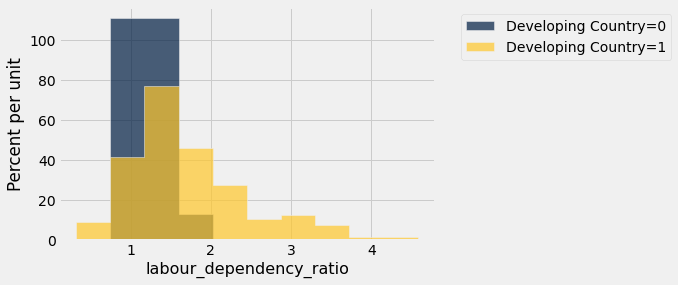

In [14]:
# Visualization 2: labour dependency ratios in the developed/developing countries.
dependency_visualization = employment.select('Developing Country', 'labour_dependency_ratio')
dependency_visualization.hist('labour_dependency_ratio', group = 'Developing Country')

Interpretations: the histogram above displays the distribution of labor dependency ratio in the developed and developing countries. In the developed countries (coded as blue), each employed individual is responsible for 1 to 2 dependents; in the developing countries (coded as yellow), there is a significant percentage of employed individual who is responsible for 2 to 4 dependents. This result is reasonable because the family size in the developing countries are expected to be larger.

# Conducting a Hypothesis test: AB Testing
Our goal is to investigate whether Covid-19 has impacted the employment rates of the developed and developing countries differently by conducting a hypothesis testing. Before we conduct the test, our question is "Does the percentage of working hours lost in the developed countries come from the same underlying distribution with the developing countries? "

- Null Hypothesis: In the world, the percentage of weekly working hours lost in the developing countries and the developed countries are the same. 
- Alternative Hypothesis: In the world, the percentage of weekly working hours lost in the developing countries is more than the developed countries.
- Test Statistics: Percentage of weekly working hours lost in developing countries minus in the developed countries. 
- Positive test statistics favor the alternative.

Reference of codes : The coding of this AB Testing and P-value calculation were taught in DATA8 course which I took at Berkeley during Spring 2020. 

In [15]:
# Select only the percentage of working hour loss column and the dummy variable "Developing Country"
AB_Testing_table = employment.select('Developing Country','percentage_of_working_hrs_lost')
AB_Testing_table

Developing Country,percentage_of_working_hrs_lost
1,6.5
1,8.6
1,3.9
1,9.3
1,21
1,16.8
0,4.7
0,10.5
1,14.1
1,-0.1


In [16]:
# Calculate the observed statistics 
Average_developing = np.mean(AB_Testing_table.where('Developing Country', 1).column('percentage_of_working_hrs_lost'))
Average_developed = np.mean(AB_Testing_table.where('Developing Country', 0).column('percentage_of_working_hrs_lost'))
observed_statistics = Average_developing - Average_developed
observed_statistics

1.8498366013071905

In [17]:
# Shuffle the dummy variable column 
Shuffle = employment.sample(with_replacement = False).column('Developing Country')

In [18]:
# Combine the shuffled column with the original table 
AB_Testing = AB_Testing_table.with_column('Shuffled Developing Country', Shuffle)
AB_Testing

Developing Country,percentage_of_working_hrs_lost,Shuffled Developing Country
1,6.5,1
1,8.6,1
1,3.9,1
1,9.3,1
1,21,1
1,16.8,1
0,4.7,1
0,10.5,1
1,14.1,1
1,-0.1,1


In [19]:
# Created a stimulation function
def one_stimulation(table, label, group_label):
    # Created a shuffled_column with the group label
    Shuffled_column = table.sample(with_replacement = False).column(group_label)
    # Added the shuffled column to the originla table
    original_and_shuffled = table.with_column('Shuffled_label', Shuffled_column)
    # Selected only the developing country after shuffling
    shuffled_developing = original_and_shuffled.where('Shuffled_label', 1)
    # Selected only the developed country after shuffling
    shuffled_developed = original_and_shuffled.where('Shuffled_label', 0)
    # Calculated the difference
    difference = np.average(shuffled_developing.column(label)) - np.average(shuffled_developed.column(label))
    return difference 

In [20]:
differences_stimulation_results = make_array()

# 5000 trials of shuffling and difference calculation
for i in np.arange(5000):
    new_difference = one_stimulation(AB_Testing_table, 'percentage_of_working_hrs_lost', 'Developing Country')
    differences_stimulation_results = np.append(differences_stimulation_results, new_difference)

Observed Statistics: 1.8498366013071905


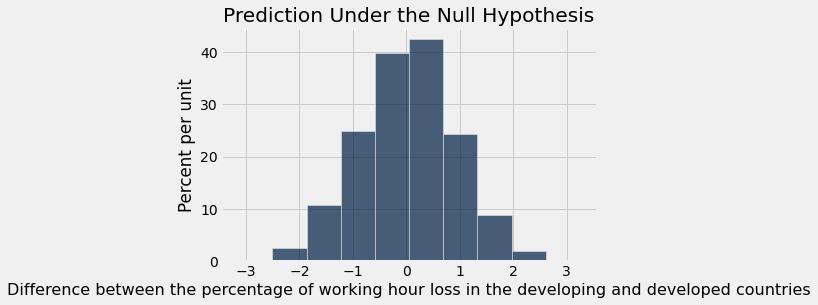

In [21]:
Table().with_column('Difference between the percentage of working hour loss in the developing and developed countries', differences_stimulation_results).hist()
print('Observed Statistics:', observed_statistics)
plots.title('Prediction Under the Null Hypothesis');

In [22]:
# p-value calculation
sum(differences_stimulation_results >= observed_statistics) / len(differences_stimulation_results)

0.0206

# Results Interpretations(AB Testing)

If we take 5% as the significance level, p-value that is calculated above is 1.74%, which is smaller than 0.05; the observed statistics is 1.84, and positive test statistic favor alternative hypothesis. We would reject the null hypothesis and conclude that the percentage of working hour loss in the developing countries is larger than the percentage of working hour loss in the developed countries under the impact of covid-19. 

# Computing Average Working Hours Per Person in Each Country
In this section, we would do column operations to calculate the average working hours per person in each country before the pandemic, using the current variables that we have.

In [23]:
# generated a total employed population column by adding the employed female and the employed males together
employed_population = employment.column('employed_female_25+_2019') + employment.column('employed_male_25+_2019')

In [24]:
# put the column of employed population in 2019 above into the original dataset
employment_with_population = employment.with_column('employed population in thousands', employed_population) 
employment_with_population

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country,employed population in thousands
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1,6759.15
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1,9336.78
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1,1151.98
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1,6107.8
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1,16760.5
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1,927.133
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0,10866.4
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0,3952.99
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1,4343.98
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1,3769.7


The total weekly hours worked column in the datasets is an estimation after covid-19, so we would need to use this
information and the percentage of working hours lost due to covid-19 to calculate the pre-shock total weekly 
hours worked. The percentage of working hours lost is the negative of (after-shock total hours - pre-shock total hours) / pre-shock total hours. We can just convert this equation to (pre-shock total hours - after-shock total hours) / pre-shock total hours. Then, the pre-shock total working hours = after-shock working hours / (1 -percentage_of_working_hrs_lost). 

In [25]:
pre_shock_total_weekly_hours = employment_with_population.column('total_weekly_hours_worked(estimates_in_thousands)') / (1 - (0.01 * employment_with_population.column('percentage_of_working_hrs_lost')))
# display the first item of this array to check if the calculation seems reasonable.
pre_shock_total_weekly_hours.item(0)

374637.0117647059

In [26]:
# put the column above in the table
# Since the total_weekly_hours_worked is an estimation from 2020, we would name the newly crated column "average weekly working hours after covid-19"
employment_pre_shock= employment_with_population.with_column('total_weekly_hours_worked before Covid-19 in thousands', pre_shock_total_weekly_hours)
employment_pre_shock

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country,employed population in thousands,total_weekly_hours_worked before Covid-19 in thousands
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1,6759.15,374637
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1,9336.78,500999
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1,1151.98,51948.5
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1,6107.8,353573
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1,16760.5,665815
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1,927.133,38027.7
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0,10866.4,423869
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0,3952.99,159239
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1,4343.98,178366
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1,3769.7,203696


Since each country has different demography, the number of employed people is also different. A total number of weekly hours worked does not present comparable information across countries. Therefore, we would need to calculate the weekly hours worked PER PERSON in each country before Covid-19 (in 2019). 

In [27]:
# Create the column described above and add it to the table. 
average_weekly_working_hours_per_person = employment_pre_shock.column('total_weekly_hours_worked before Covid-19 in thousands')/employment_pre_shock.column('employed population in thousands')
employment_individual = employment_pre_shock.with_column('average weekly working hours per person before Covid-19', average_weekly_working_hours_per_person) 
employment_individual

country,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64,Developing Country,employed population in thousands,total_weekly_hours_worked before Covid-19 in thousands,average weekly working hours per person before Covid-19
Afghanistan,350286,6.5,607.476,506.23,3.57,1334.24,5424.91,16.2,1,6759.15,374637,55.4266
Angola,457913,8.6,1075.84,896.532,1.7,4612.11,4724.67,27.1,1,9336.78,500999,53.6587
Albania,49922.5,3.9,51.087,42.572,1.77,500.112,651.87,25.5,1,1151.98,51948.5,45.0949
United Arab Emirates,320690,9.3,824.579,687.149,0.41,996.03,5111.77,38.6,1,6107.8,353573,57.8887
Argentina,525994,21,3492.56,2910.47,1.43,7264.33,9496.19,18.1,1,16760.5,665815,39.7252
Armenia,31639,16.8,159.418,132.848,1.72,407.158,519.975,15.8,1,927.133,38027.7,41.0164
Australia,403947,4.7,503.053,419.211,0.99,5017.15,5849.21,24.6,0,10866.4,423869,39.0075
Austria,142519,10.5,417.616,348.013,1.05,1843.94,2109.05,23.8,0,3952.99,159239,40.2832
Azerbaijan,153216,14.1,630.631,525.526,1.13,2106.55,2237.43,21.7,1,4343.98,178366,41.0605
Burundi,203900,-0.1,-4.467,-3.723,1.36,1931.62,1838.08,32.7,1,3769.7,203696,54.0351


In [28]:
# the mean for average weekly working hours per person in the developing country
np.mean(employment_individual.where('Developing Country', 1).column('average weekly working hours per person before Covid-19'))

48.67377000392789

In [29]:
# the mean for average weekly working hours per person in the developed country
np.mean(employment_individual.where('Developing Country', 0).column('average weekly working hours per person before Covid-19'))

40.441416006340035

/opt/conda/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


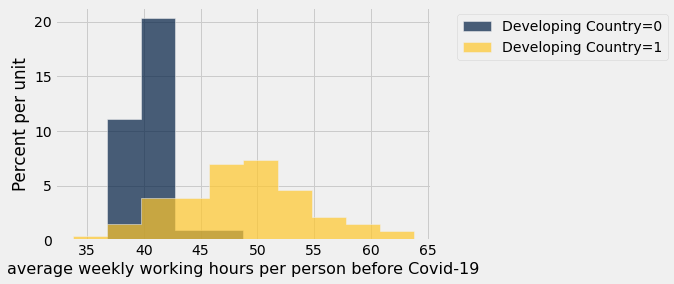

In [30]:
# Visualization: individual's weekly working hours before Covid-19 in the developed/developing countries.
pre_shock_weekly_hours_visualization = employment_individual.select('Developing Country', 'average weekly working hours per person before Covid-19')
pre_shock_weekly_hours_visualization.hist('average weekly working hours per person before Covid-19', group = 'Developing Country')

Interpretation: The two-color histogram on the top displays different distributions of average weekly working hours per person in the developed and developing country. It is notable that the distribution of the developed country, coded as blue, concentrated significantly on the left. The workers in these developed countries tend to work 40 hours per week. Compare with the developed countries, the workers in the developing countries (coded as yellow) tend to work up to 65 hours per week before the pandemic. 

# Regression Analysis 1
- Reference: https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
- Reference: Economics 140 class taught at Berkeley 

We would perform the regression test -- the indepedent variable is the dummy variable "Developing Country", and the dependent variable is average weeking working hours per person before Covid-19

In [31]:
# assign names to the dependent/independent variable
Average_ww_hours_per_person = employment_individual.column('average weekly working hours per person before Covid-19')
Developing_country = employment_individual.column('Developing Country').reshape((-1, 1))

In [36]:
# perform the analysis
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X_final = sm.add_constant(Developing_country)
est = sm.OLS(Average_ww_hours_per_person, X_final)
model_final = est.fit()
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     69.94
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.38e-14
Time:                        14:42:27   Log-Likelihood:                -582.87
No. Observations:                 189   AIC:                             1170.
Df Residuals:                     187   BIC:                             1176.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.4414      0.886     45.663      0.0

# Results Interpretations (Regression Analysis 1) 

The employees in the developing countries work 8.2324 hours more than the employees in the developed countries on average -- this result is also presented in the mean
computations before the regression analysis. Since the p-value for the coefficient x1 is 0, it indicates that the
coefficient x1 is statistically significant. In other words, the difference between the average working hours in 
the developing and developed countries is statistically significant. 

# Regression Analysis 2
Another question that we could ask in this project is how is the percentage of working hour lost and the average weekly working hours before the pandemic correlated? It may be possible that there is a universal pattern that the more hours people work before the pandemic, the larger percentage of working hours they could lose after the pandemic, regardless of whether they are in developing or developed countries. We would perform the following regression to see if this is the case. 

In [35]:
# Perform the regression test -- the indepedent variable is the average weekly working hours per person before Covid, 
# and the dependent variable is percentage of working hour lost
percentage_working_hour_lost = employment_individual.column('percentage_of_working_hrs_lost')
X2_final = sm.add_constant(Average_ww_hours_per_person)
est = sm.OLS(percentage_working_hour_lost, X2_final)
model_final_2 = est.fit()
print(model_final_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1552
Date:                Thu, 01 Jul 2021   Prob (F-statistic):              0.694
Time:                        14:42:19   Log-Likelihood:                -565.44
No. Observations:                 189   AIC:                             1135.
Df Residuals:                     187   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8729      2.703      3.653      0.0

# Result Interpretation (Regression Analysis 2)
According to the p-value associated with the x1 coefficient above, the x1 coefficient is statistically insignificant. In other words, the regression analysis above does not provide evidences that the more people work before the pandemic, the larger percentage of working hours they would lose. The developing countries tend to lose a larger percentage of working hours -- but it is not because they were previously working more. It could be the other way around. The developing countries have lost a larger percentage of working hours; this negative effect brought by the pandemic is even amplified given that they were already working more before the pandemic. 

Numerically speaking, the developing countries tend to lose more working hours. Since this project does not take each country's wage level into considerations, we cannot conclude that developing countries have a larger wage loss compare with the developed countries. However, it can be confirmed that the employees in the developing countries have suffered more from their income loss based on the standard of their own consumption levels (vertical comparison). 

In addition, we could also combine the result of this regression to the labor_dependency ratio visualization that we've developed earlier. That is, the workers in the developing countries need to be financially responsible to more family members. With larger working hour loss, the survival pressure is also amplified by the large family size. 

# Conclusion
Based on the analysis presented in this analysis, the developing countries tend to lose larger 
percentage of working hours due to covid-19. Furthermore, they have higher average of weekly working hours before the pandemic. Combining these two results together, the workers in the developing country lose more working hours after the pandemic. 

I originally suspected that there may be a max threshold (for instance maximum 8 hours per day, 5 days per week) that people could work after the pandemic occur. This could cause the percentage loss of working hours to be larger in countries with higher average of pre-pandemic weekly working hours. But the second regression analysis has proven that this is not the case. The developing countries lose more working hours not because they were working longer hours before Covid-19. In fact, there could be many social, economic, and political characteristics of the developing countries that would make their employment conditions vulnerable to the pandemic shock: 
- Their fragile economies focus on manufacturing, construction, services, and minning. These jobs are easily replaceable. During the pandemic period, the unemployment rates associated with these job could be high, bringing up a large percentage of working hour loss countrywise.
- The economies of the developing countries reply heavily on the global economy, and Covid-19 pandemic is a global event that would affect us all. The developing countries don't have sufficient abiities to buffer the pandemic shock within their country.   

The conditions that we did not capture in this project:
- The legal system for labor protection in the developing countries are relatively poorly regulated -- exploitations and child labor may exist. Although the data already demonstrated a clear disparity between the employments in the developing countries and the developed countries, the working hour lost could still be under-reported in the developing countries.

Direct comparison of empoyments in developing and developed countries under Covid-19 pandemic: 
- Compare to the developed country, the developing countries generally have larger family size. More family members are depending on one stream of income. When the developing countries lose more working hours, their larger family size would make life harder during the pandemic. 